In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('medical_examination.csv')


In [5]:
df["BMI"] = df["weight"] / ((df["height"]/100) ** 2)

In [6]:
df['overweight'] = (df['BMI'] > 25).astype(int)


In [7]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0


In [8]:
df[["BMI", "overweight"]].head()

,BMI,overweight
0,21.967120,0
1,34.927679,1
2,23.507805,0
3,28.710479,1
4,23.011177,0


In [9]:
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)

In [10]:
df_cat = pd.melt(df,
                     id_vars=['cardio'],
                     value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

In [11]:
df_cat = df_cat.value_counts().reset_index(name='total')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

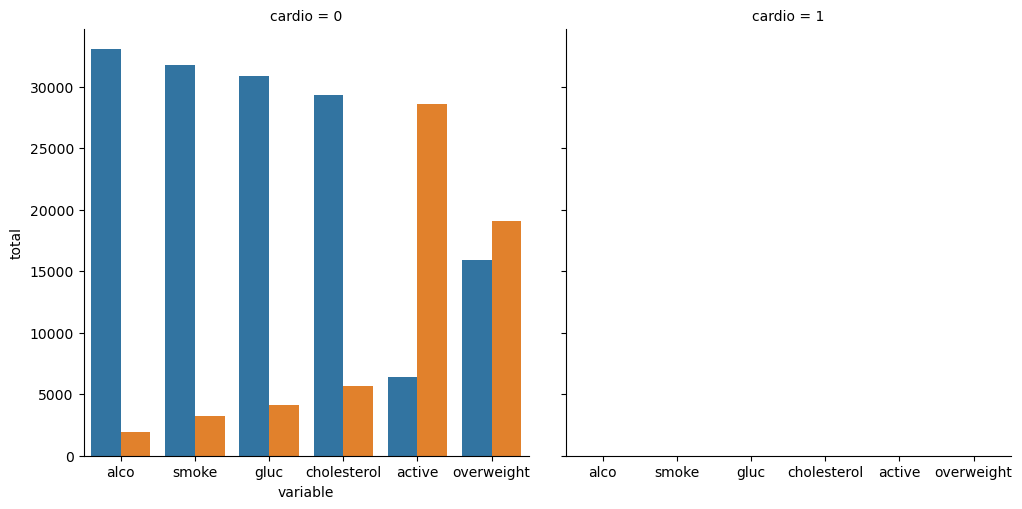

In [12]:
fig = sns.catplot(x='variable', y='total', hue='value', col='cardio', kind='bar', data=df_cat).fig

In [13]:
def draw_heat_map():
    # 5.1 Clean the data
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # 5.2 Calculate correlation matrix
    corr = df_heat.corr()

    # 5.3 Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # 5.4 Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 10))

    # 5.5 Draw the heatmap
    sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

    return fig